In [ ]:
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, BatchNormalization,concatenate # Базовые слои keras
from tensorflow.keras.models import Sequential, Model # Формат модели keras
from tensorflow.keras.optimizers import Nadam, RMSprop, Adamax, Adam # Оптимизатор
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LambdaCallback
from keras.utils import plot_model

import matplotlib.pyplot as plt # Отображение графиков
import os

import numpy as np # Numpy массивы
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#path = '/content/drive/My Drive/2020/Hacaton_LD2020/Train' # Для запуска с гугла команды
path = '/content/drive/My Drive/Hacaton_LD2020/Train' # для запуска с компа Ильи
os.chdir(path)
spisok = os.listdir(path)
spisok.sort()
print (len(spisok), '\n', spisok[:7])

101 
 ['0.xlsx', '1.xlsx', '10.xlsx', '100.xlsx', '11.xlsx', '12.xlsx', '13.xlsx']


In [ ]:
df = pd.read_excel((spisok[1]))
df.fillna(0, inplace=True) # Убираем NaN
df[:5]

,Y_DAY,Y_RUB,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col15,Col16,Col17,Col18,Unnamed: 19
0,1.0,1200.0,1,Работа 1,2020-10-16,0,2020-11-15,-1,0,0,30,24,-1,0.0,1,0,"(0,0,0,0,0,0,0,0,0,0)",0.0,Подрядные работы,Col12
1,0.0,0.0,2,Работа 2,2020-10-17,0,2020-11-16,0,0,0,30,24,3,0.0,1,0,"(1,0,0,0,0,0,0,0,0,0)",0.0,Подрядные работы,0
2,0.0,0.0,3,Работа 3,2020-10-18,1,2020-11-17,12,1200,1200,30,24,12,0.0,1,0,"(0,0,1,0,0,0,0,0,0,0)",0.0,Подрядные работы,0
3,0.0,0.0,4,Работа 4,2020-10-19,0,2020-11-18,-1,-1,0,30,24,6,0.0,1,0,"(0,0,0,1,0,0,0,0,0,0)",0.0,Подрядные работы,0
4,0.0,0.0,5,Работа 5,2020-10-20,0,2020-11-19,0,0,0,30,30,-1,0.0,1,0,"(0,0,0,0,1,0,0,0,0,0)",0.0,Подрядные работы,0


In [ ]:
y_day = df.iloc[0, 0]
y_rub = df.iloc[0, 1]
y_day , y_rub

(1.0, 1200.0)

In [ ]:
def loadFiles(path, spisok):
    os.chdir(path)
    x_train, y_day, y_rub = [], [], []
    for i in range(len(spisok)):
        df = pd.read_excel(spisok[i])
        df.fillna(0, inplace=True) # Убираем NaN
        yd = df['Y_DAY'][0]
        yr = df['Y_RUB'][0]
        y_day.append(yd) #
        y_rub.append(yr) #
        del df['Y_DAY'], df['Y_RUB']
        del df['Unnamed: 19'], df['Col3'], df['Col4'], df['Col6'], df['Col15'], df['Col16'], df['Col18']
        df = np.array(df)
        x_train.append(df) #Добавляем  в массив

    x_train = np.array(x_train)  
    y_day = np.array(y_day)
    y_rub = np.array(y_rub)
    return x_train, y_day, y_rub

In [ ]:
x_train, y_day, y_rub = loadFiles(path, spisok)

In [ ]:
y_rub_test = y_rub[-1]
y_day_test = y_day[-1]
x_test = x_train[-1]

In [ ]:
y_day.shape, y_day[:5]

((101,), array([  0.,   1.,  10., 100.,  11.]))

In [ ]:
y_rub.shape, y_rub[:5]

((101,), array([     0.,   1200.,  12000., 120000.,  13200.]))

In [ ]:
x_test = x_test.reshape(1, 23, 11)
x_train.shape, x_test.shape

((101, 23, 11), (1, 23, 11))

In [ ]:
x_test[0][:3]

array([[ 1.000e+00,  0.000e+00, -1.000e+00,  0.000e+00,  0.000e+00,
         3.000e+01,  2.400e+01, -1.000e+00,  0.000e+00,  1.000e+00,
         0.000e+00],
       [ 2.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         3.000e+01,  2.400e+01,  3.000e+00,  0.000e+00,  1.000e+00,
         0.000e+00],
       [ 3.000e+00,  9.900e+01,  1.200e+01,  1.200e+03,  1.188e+05,
         3.000e+01,  2.400e+01,  1.200e+01,  0.000e+00,  1.000e+00,
         0.000e+00]])

In [ ]:
# Вычисляем матрицы для определения причины нарушени планов
y_train = []
for i in range(1, len(x_train)):
  y = x_train[i] - x_train[i-1]
  y_train.append(y)

y_train = np.array(y_train)
y_train.shape

(100, 23, 11)

In [ ]:
# Теперь нужно удалить 

# Блок нейросетей

In [ ]:
#os.chdir('/content/drive/My Drive/2020/Hacaton_LD2020') # для запуска с гогла команды
os.chdir('/content/drive/My Drive/Hacaton_LD2020') # Для запуска с компа Ильи

In [ ]:
size_y_train = (len(x_train[0]), len(x_train[0][0]))
size_y_train

(23, 11)

## Model Y-RUB - для предикта Затрат по проекту

Model: "functional_148"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_85 (InputLayer)        [(None, 23, 11)]          0         
_________________________________________________________________
flatten_84 (Flatten)         (None, 253)               0         
_________________________________________________________________
dense_233 (Dense)            (None, 10000)             2540000   
_________________________________________________________________
dropout_15 (Dropout)         (None, 10000)             0         
_________________________________________________________________
dense_234 (Dense)            (None, 1000)              10001000  
_________________________________________________________________
dense_235 (Dense)            (None, 1)                 1001      
Total params: 12,542,001
Trainable params: 12,542,001
Non-trainable params: 0
________________________________________

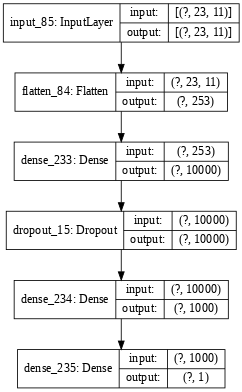

In [ ]:
# НС, для подсчета изменения бюджета в рублях
input = Input(shape = size_y_train)
x = Flatten()(input)

x = Dense(10000, activation='linear')(x)
x = Dropout(0.2)(x)
x = Dense(1000, activation='linear')(x)
x = Dense(1, activation='linear')(x)

modelRUB = Model(input, x)

modelRUB.summary()
plot_model(modelRUB, dpi=60, show_shapes=True, show_layer_names=True)

In [ ]:
modelRUB.compile(optimizer=Adam(learning_rate=0.00001), loss='mse')

# коллбэки
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 8, verbose = 0, restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-07, verbose = 1)

# fit model
history = modelRUB.fit(x_train, y_rub, epochs=2000, verbose=0,
                    validation_split = 0.2,
                    callbacks = [early_stopping, reduce_lr])


Epoch 00018: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.

Epoch 00020: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-06.

Epoch 00022: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-06.

Epoch 00024: ReduceLROnPlateau reducing learning rate to 6.24999984211172e-07.


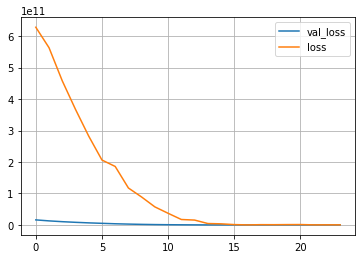

In [ ]:
#Выводим график точности распознавания на обучающей и проверочной выборках
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
predRUB = modelRUB.predict(x_test)
predRUB
corrAnswer = y_rub[100]
print('Правильный ответ = ', corrAnswer, '\tПредсказание Нейросети = ', predRUB,
      '\nАбсолютное отклонение = ', predRUB - 100,
      '\tОтносительное отклонение = ', ((abs(predRUB)-abs(corrAnswer))/corrAnswer*100), '%')

Правильный ответ =  118800.0 	Предсказание Нейросети =  [[119030.984]] 
Абсолютное отклонение =  [[118930.984]] 	Относительное отклонение =  [[0.19443129]] %


## Model Y-DAY - модель для определения изменения сроков проекта

Model: "functional_146"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_84 (InputLayer)        [(None, 23, 11)]          0         
_________________________________________________________________
flatten_83 (Flatten)         (None, 253)               0         
_________________________________________________________________
dense_229 (Dense)            (None, 2000)              508000    
_________________________________________________________________
dense_230 (Dense)            (None, 2000)              4002000   
_________________________________________________________________
dense_231 (Dense)            (None, 2000)              4002000   
_________________________________________________________________
dense_232 (Dense)            (None, 1)                 2001      
Total params: 8,514,001
Trainable params: 8,514,001
Non-trainable params: 0
__________________________________________

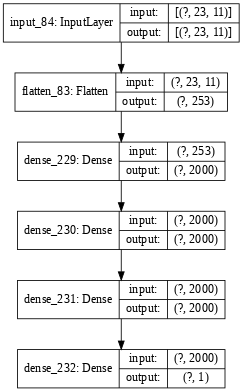

In [ ]:
# НС для определения изменения сроков выполнения плана в днях
input = Input(shape = size_y_train)
x = Flatten()(input)

x = Dense(2000, activation='relu')(x)
x = Dense(2000, activation='relu')(x)
x = Dense(2000, activation='relu')(x)
x = Dense(1, activation='linear')(x)

modelDAY = Model(input, x)

modelDAY.summary()
plot_model(modelDAY, dpi=60, show_shapes=True, show_layer_names=True)

In [ ]:
modelDAY.compile(optimizer=Nadam(learning_rate=0.00001), loss='mse')

# коллбэки
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 8, verbose = 0, restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=2, min_lr=1e-07, verbose = 1)

# fit model
history = modelDAY.fit(x_train, y_day, epochs=2000, verbose=0,
                    validation_split = 0.2, shuffle = True,
                    callbacks = [early_stopping, reduce_lr])


Epoch 00003: ReduceLROnPlateau reducing learning rate to 7.999999797903002e-06.

Epoch 00005: ReduceLROnPlateau reducing learning rate to 6.399999983841554e-06.

Epoch 00015: ReduceLROnPlateau reducing learning rate to 5.120000059832819e-06.

Epoch 00019: ReduceLROnPlateau reducing learning rate to 4.095999975106679e-06.

Epoch 00021: ReduceLROnPlateau reducing learning rate to 3.276799907325767e-06.

Epoch 00027: ReduceLROnPlateau reducing learning rate to 2.6214398531010375e-06.

Epoch 00029: ReduceLROnPlateau reducing learning rate to 2.097151809721254e-06.

Epoch 00031: ReduceLROnPlateau reducing learning rate to 1.6777214113972151e-06.

Epoch 00033: ReduceLROnPlateau reducing learning rate to 1.3421771654975602e-06.


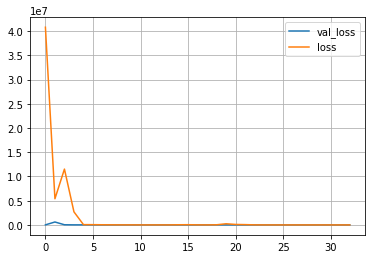

In [ ]:
#Выводим график точности распознавания на обучающей и проверочной выборках
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
predDAY = modelDAY.predict(x_test)
predDAY
corrAnswer = y_day[100]
print('Правильный ответ = ', corrAnswer, '\tПредсказание Нейросети = ', predDAY,
      '\nАбсолютное отклонение = ', predDAY - 100,
      '\tОтносительное отклонение = ', ((abs(predDAY)-abs(corrAnswer))/corrAnswer*100), '%')

Правильный ответ =  99.0 	Предсказание Нейросети =  [[103.62734]] 
Абсолютное отклонение =  [[3.6273422]] 	Относительное отклонение =  [[4.6740828]] %


## НС для определения причин нарушения планов
----
тут нужен AE, но не на сверточных сетях, тк там идет искажение/сглаживание информации

Model: "functional_212"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_121 (InputLayer)       [(None, 23, 11)]          0         
_________________________________________________________________
flatten_120 (Flatten)        (None, 253)               0         
_________________________________________________________________
dense_367 (Dense)            (None, 4000)              1016000   
_________________________________________________________________
dense_368 (Dense)            (None, 253)               1012253   
_________________________________________________________________
dense_369 (Dense)            (None, 4000)              1016000   
_________________________________________________________________
dense_370 (Dense)            (None, 253)               1012253   
_________________________________________________________________
reshape_35 (Reshape)         (None, 23, 11)         

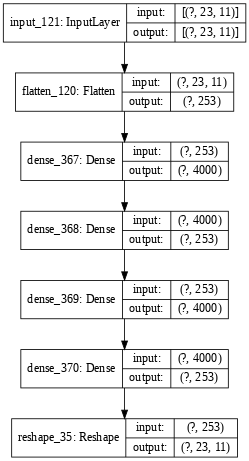

In [ ]:
# НС для определения причин изменения плана
input = Input(shape = size_y_train)
x = Flatten()(input)

x = Dense(4000, activation='relu')(x)
x = Dense(len(x_train[0])*len(x_train[0][0]), activation='relu')(x)
x = Dense(4000, activation='relu')(x)

x = Dense(len(x_train[0])*len(x_train[0][0]), activation='relu')(x)
x = Reshape((size_y_train))(x)

modelWHY = Model(input, x)

modelWHY.summary()
plot_model(modelWHY, dpi=60, show_shapes=True, show_layer_names=True)

In [ ]:
modelWHY.compile(optimizer=Adam(learning_rate=0.00001), loss='mse')

# коллбэки
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 8, verbose = 0, restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=2, min_lr=1e-07, verbose = 1)

# fit model
history = modelWHY.fit(x_train[-len(y_train):], y_train, epochs=2000, verbose=1,
                    validation_split = 0.2, shuffle = True,
                    callbacks = [early_stopping, reduce_lr])

Epoch 1/2000
3/3 [==============================] - 0s 44ms/step - loss: 4003713536.0000 - val_loss: 9262256.0000
Epoch 2/2000
3/3 [==============================] - 0s 13ms/step - loss: 4002214656.0000 - val_loss: 9229562.0000
Epoch 3/2000
3/3 [==============================] - 0s 13ms/step - loss: 4001517056.0000 - val_loss: 9198919.0000
Epoch 4/2000
3/3 [==============================] - 0s 13ms/step - loss: 3999841792.0000 - val_loss: 9176190.0000
Epoch 5/2000
3/3 [==============================] - 0s 13ms/step - loss: 3999166976.0000 - val_loss: 9155764.0000
Epoch 6/2000
3/3 [==============================] - 0s 13ms/step - loss: 3998403840.0000 - val_loss: 9139395.0000
Epoch 7/2000
3/3 [==============================] - 0s 14ms/step - loss: 3997826560.0000 - val_loss: 9125932.0000
Epoch 8/2000
3/3 [==============================] - 0s 12ms/step - loss: 3997331456.0000 - val_loss: 9114977.0000
Epoch 9/2000
3/3 [==============================] - 0s 14ms/step - loss: 3996939776.0000

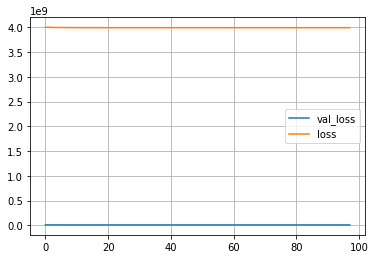

In [ ]:
#Выводим график точности распознавания на обучающей и проверочной выборках
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
predWHY = modelWHY.predict(x_test)
predWHY

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 6.717806  , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [5.1606846 , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.     

In [ ]:
print('Правильный ответ:\n', x_test)

Правильный ответ:
 [[[ 1.000e+00  0.000e+00 -1.000e+00  0.000e+00  0.000e+00  3.000e+01
    2.400e+01 -1.000e+00  0.000e+00  1.000e+00  0.000e+00]
  [ 2.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  3.000e+01
    2.400e+01  3.000e+00  0.000e+00  1.000e+00  0.000e+00]
  [ 3.000e+00  9.900e+01  1.200e+01  1.200e+03  1.188e+05  3.000e+01
    2.400e+01  1.200e+01  0.000e+00  1.000e+00  0.000e+00]
  [ 4.000e+00  0.000e+00 -1.000e+00 -1.000e+00  0.000e+00  3.000e+01
    2.400e+01  6.000e+00  0.000e+00  1.000e+00  0.000e+00]
  [ 5.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  3.000e+01
    3.000e+01 -1.000e+00  0.000e+00  1.000e+00  0.000e+00]
  [ 6.000e+00  0.000e+00  6.000e+00  6.000e+02  0.000e+00  3.000e+01
    2.100e+01  6.000e+00  0.000e+00  1.000e+00  0.000e+00]
  [ 7.000e+00  0.000e+00  1.000e+01  4.550e+02  0.000e+00  3.000e+01
    3.000e+01 -1.000e+00  0.000e+00  1.000e+00  0.000e+00]
  [ 8.000e+00  0.000e+00 -1.000e+00 -1.000e+00  0.000e+00  3.000e+01
    2.100e+01  0